In [1]:
import pandas as pd
from io import StringIO
import kaggle
import os

# Reemplaza 'autor/dataset' con el nombre correcto del dataset en Kaggle
dataset = "abhishek14398/salary-dataset-simple-linear-regression"  # Ejemplo

# Obtener lista de archivos del dataset
files = kaggle.api.dataset_list_files(dataset).files

# Selecciona el primer archivo CSV (o el que necesites)
csv_file = next(f for f in files if f.name.endswith('.csv'))

# Descarga el archivo
kaggle.api.dataset_download_file(dataset, csv_file.name, path='.')

# Leer el archivo descargado en un DataFrame
df = pd.read_csv(csv_file.name)

# Eliminar el archivo descargado
os.remove(csv_file.name)

print(df.head())

Dataset URL: https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression
   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = df

# Define features and target variable
X = data[['YearsExperience']]  # replace with your features
y = data['Salary']  # replace with your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 49830096.855908334
R-squared: 0.9024461774180498


In [3]:
LINE_1 = []
LINE_2 = []

for i in np.arange(min(df['YearsExperience']), max(df['YearsExperience']) + 1, 1):
    LINE_1.append(i)
    LINE_2.append(model.predict([[i]])[0])

d:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  w

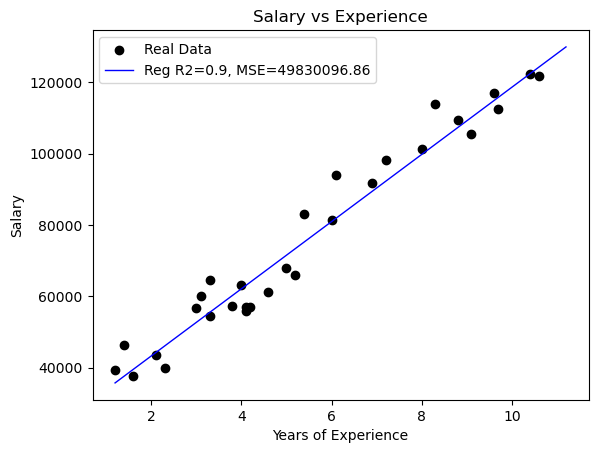

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df['YearsExperience'], df['Salary'], color='black', label='Real Data')
plt.plot(LINE_1, LINE_2, color='blue', linewidth=1, label='Reg R2={}, MSE={}'.format(round(r2, 2), round(mse, 2)))
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()

In [23]:
from sklearn.preprocessing import PolynomialFeatures

LINE_1 = []
LINE_2 = []
LINE_3 = []
LINE_4 = []
LINE_5 = []

for i in np.arange(2, 101, 1):
    print('Generando regresion para grado {}'.format(i))

    X = data[['YearsExperience']]  # replace with your features
    y = data['Salary']  # replace with your target variable

    # Create polynomial features
    poly = PolynomialFeatures(degree=i)
    X_poly = poly.fit_transform(X)

    # Split the data into training and testing sets
    X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

    # Create a linear regression model
    model_poly = LinearRegression()

    # Train the model
    model_poly.fit(X_train_poly, y_train)

    pred = model_poly.predict(X_test_poly)
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    print('Grado: {}, MSE: {}, R2: {}'.format(i, mse, r2))

    for j in np.arange(min(df['YearsExperience']), max(df['YearsExperience']) + 0.05, 0.05):
        LINE_1.append(j)
        sub = poly.fit_transform([[j]])
        pred = model_poly.predict(sub)
        LINE_2.append(pred[0])
        LINE_3.append(i)
        LINE_4.append(r2)
        LINE_5.append(mse)

df_poly = pd.DataFrame({'YearsExperience': LINE_1, 'Salary': LINE_2, 'Degree': LINE_3, 'R2': LINE_4, 'MSE': LINE_5})
df_poly = df_poly[df_poly['R2'] >= 0.8]
df_poly

Generando regresion para grado 2
Grado: 2, MSE: 52527916.36877487, R2: 0.8971645780890872
Generando regresion para grado 3
Grado: 3, MSE: 48605815.3318873, R2: 0.9048429887854864
Generando regresion para grado 4
Grado: 4, MSE: 49557837.26106713, R2: 0.9029791879054301
Generando regresion para grado 5
Grado: 5, MSE: 46560480.97329093, R2: 0.9088471990465311
Generando regresion para grado 6
Grado: 6, MSE: 44676156.57289518, R2: 0.9125361954531526
Generando regresion para grado 7
Grado: 7, MSE: 54512859.54947298, R2: 0.8932785973845943
Generando regresion para grado 8
Grado: 8, MSE: 53471860.84642296, R2: 0.8953165906696372
Generando regresion para grado 9
Grado: 9, MSE: 71129460.0997882, R2: 0.860747797641459
Generando regresion para grado 10
Grado: 10, MSE: 49708268.1695609, R2: 0.9026846849627511
Generando regresion para grado 11
Grado: 11, MSE: 46882027.17922774, R2: 0.9082176987343691
Generando regresion para grado 12
Grado: 12, MSE: 44063064.8121985, R2: 0.9137364629345185
Generando

,YearsExperience,Salary,Degree,R2,MSE
0,1.20,36731.981583,2,0.897165,5.252792e+07
1,1.25,37165.949702,2,0.897165,5.252792e+07
2,1.30,37600.320925,2,0.897165,5.252792e+07
3,1.35,38035.095252,2,0.897165,5.252792e+07
4,1.40,38470.272683,2,0.897165,5.252792e+07
...,...,...,...,...,...
4720,10.40,122509.089844,26,0.835797,8.387431e+07
4721,10.45,163035.714844,26,0.835797,8.387431e+07
4722,10.50,192439.152344,26,0.835797,8.387431e+07
4723,10.55,189782.621094,26,0.835797,8.387431e+07


Text(0, 0.5, 'Salary')

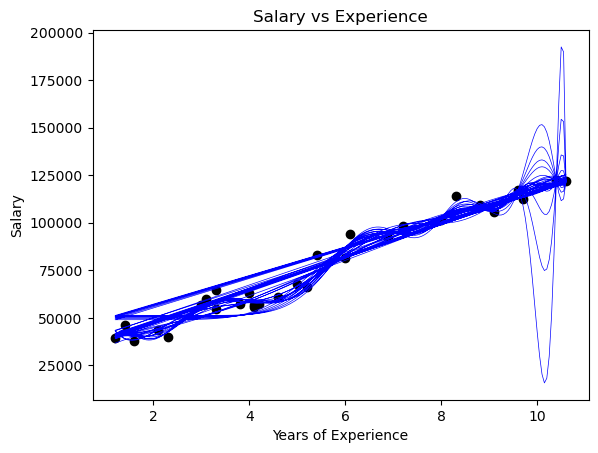

In [24]:
plt.scatter(df['YearsExperience'], df['Salary'], color='black', label='Real Data')
plt.plot(df_poly['YearsExperience'], df_poly['Salary'], color='blue', linewidth=0.5, label='Reg R2={}, MSE={}'.format(round(r2, 4), round(mse, 2)))
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

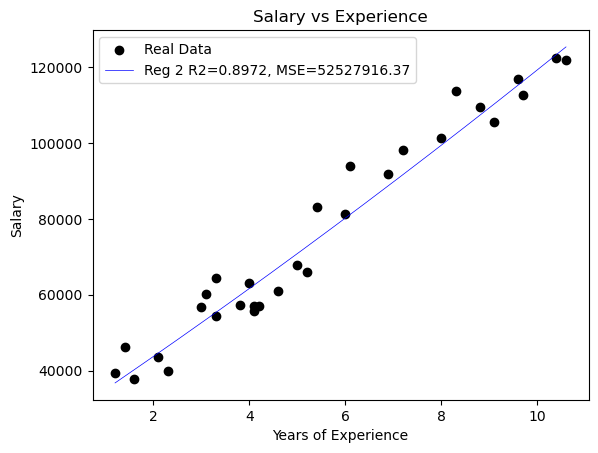

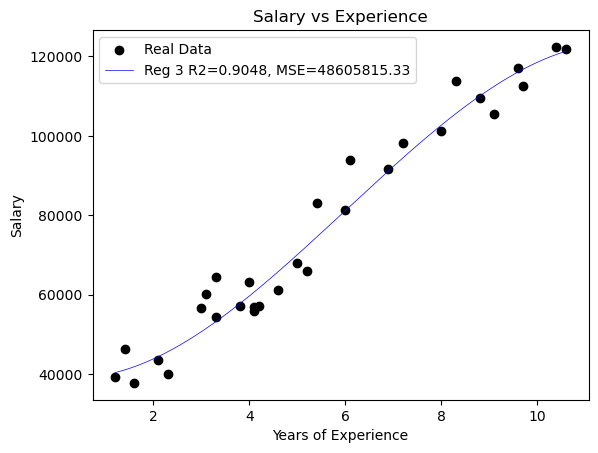

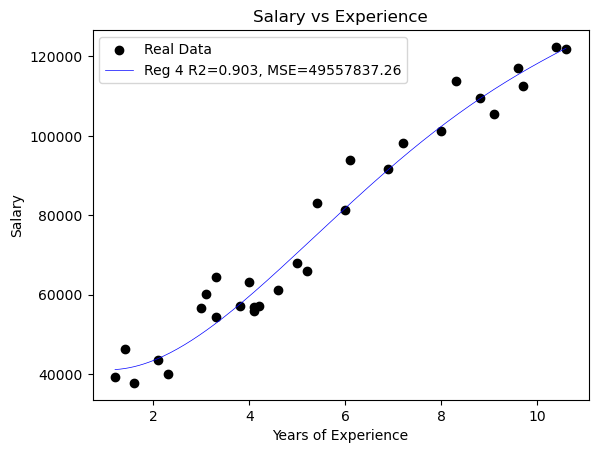

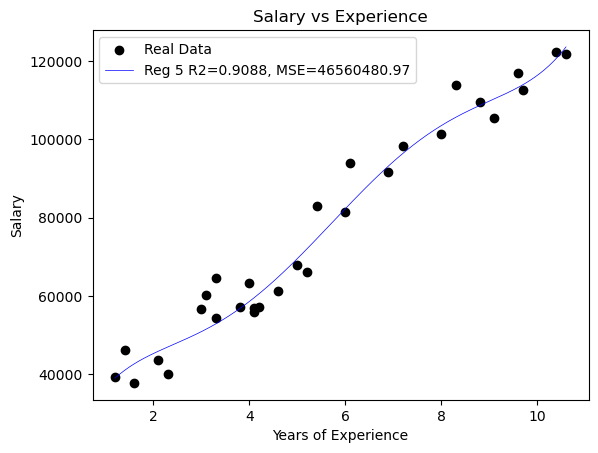

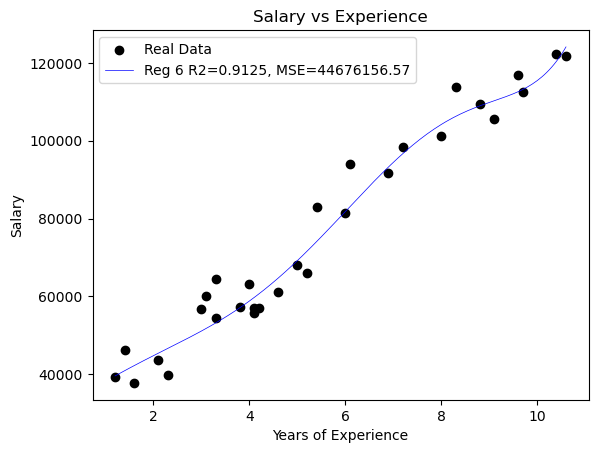

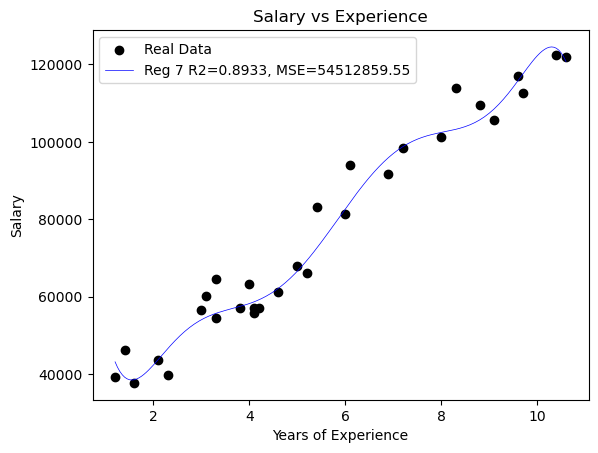

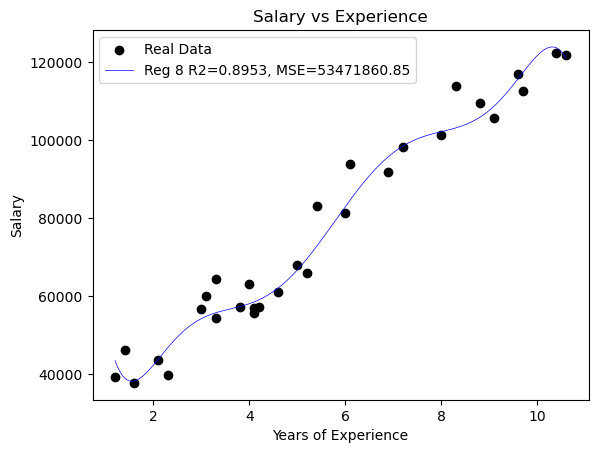

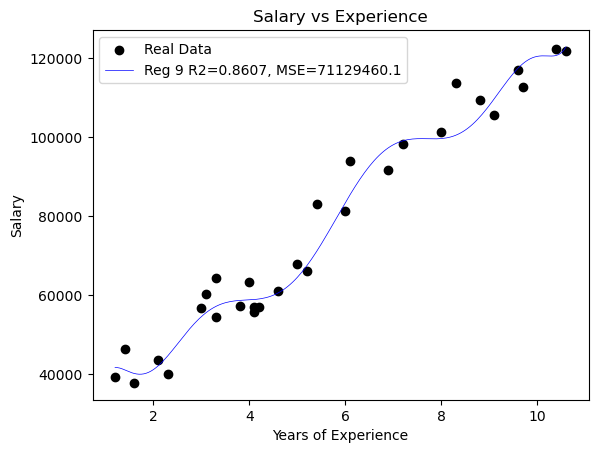

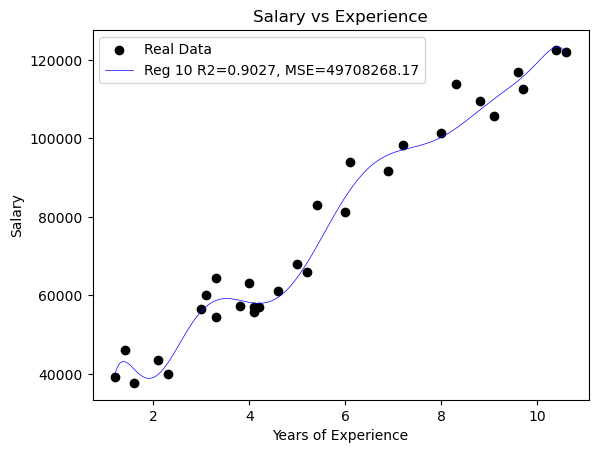

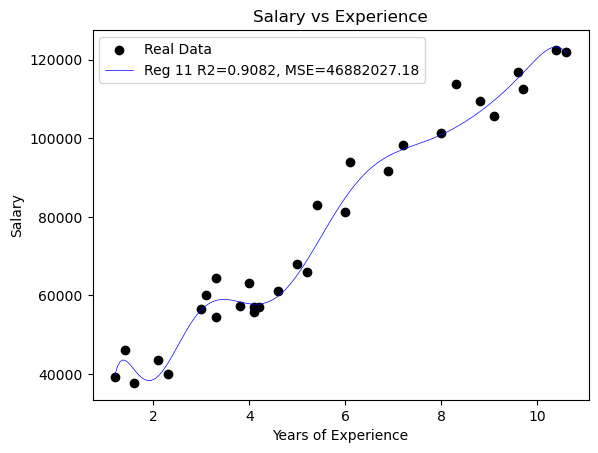

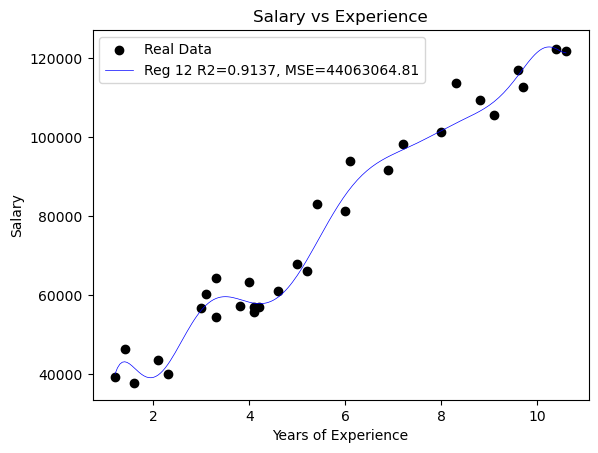

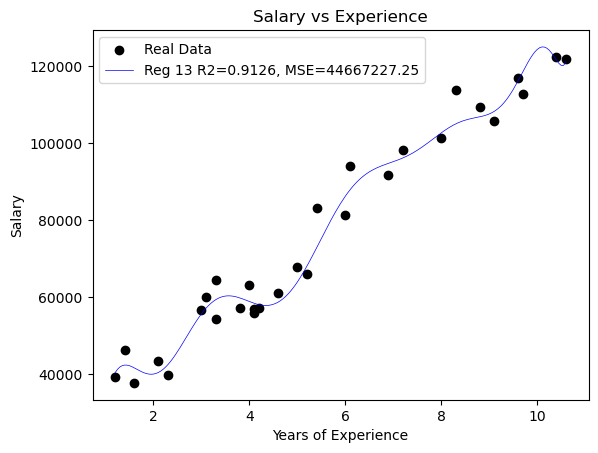

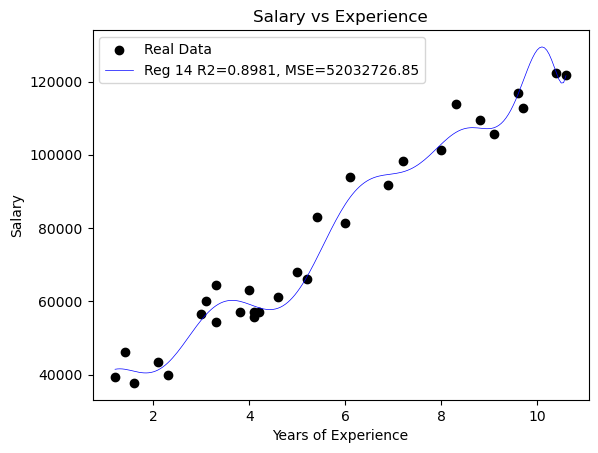

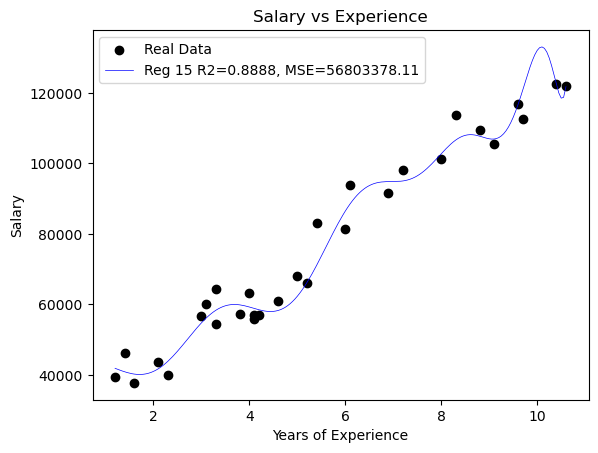

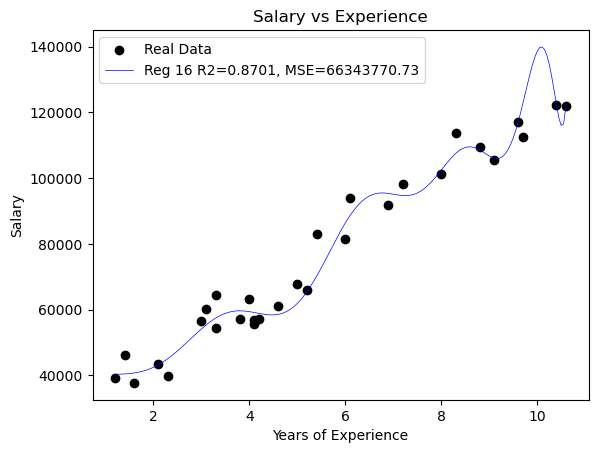

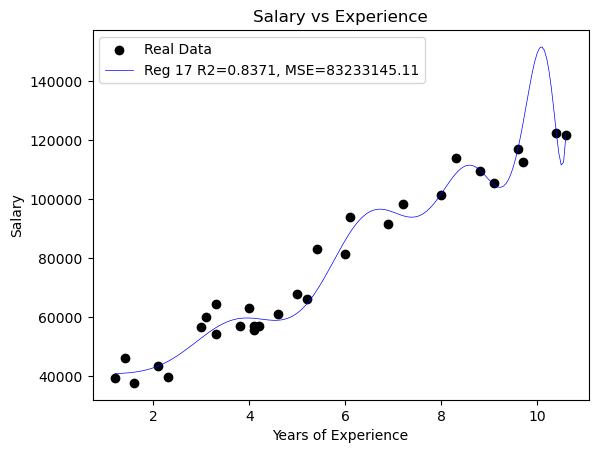

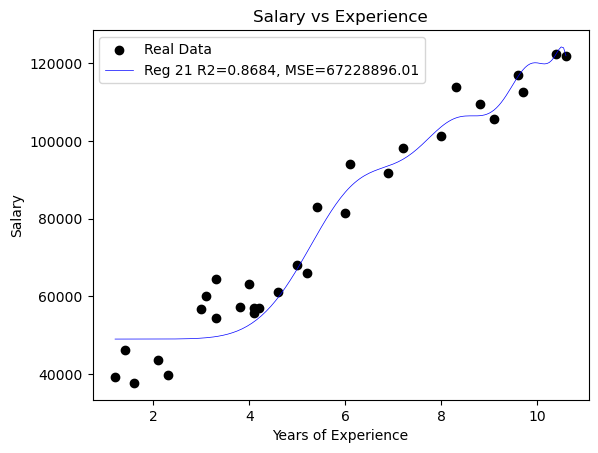

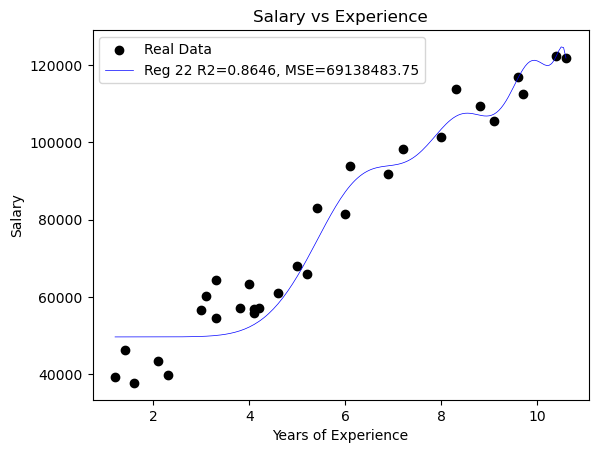

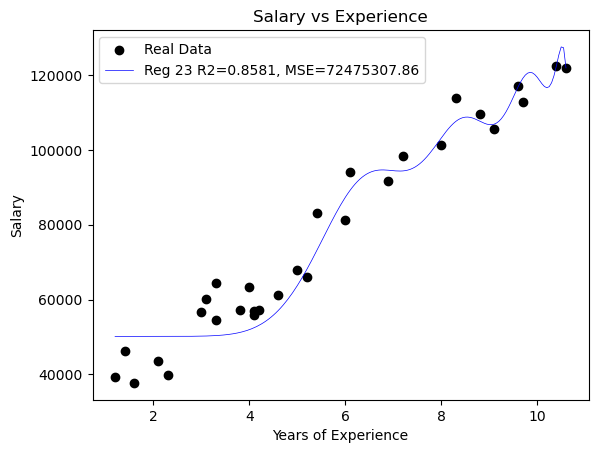

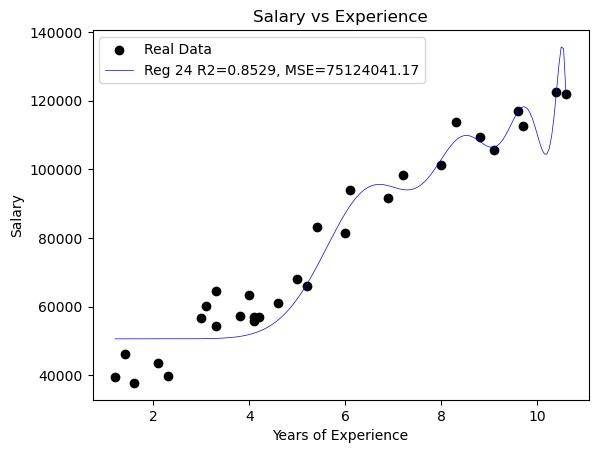

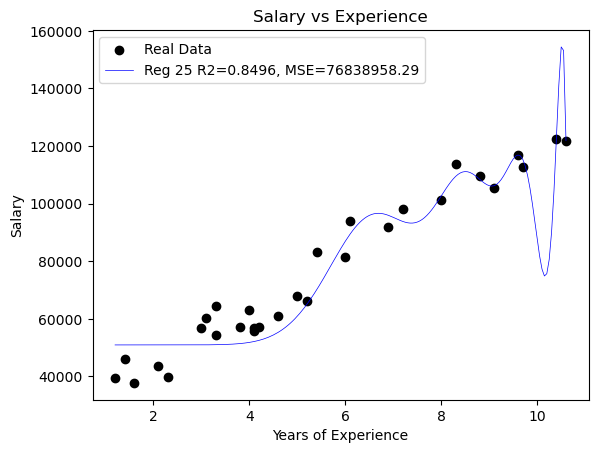

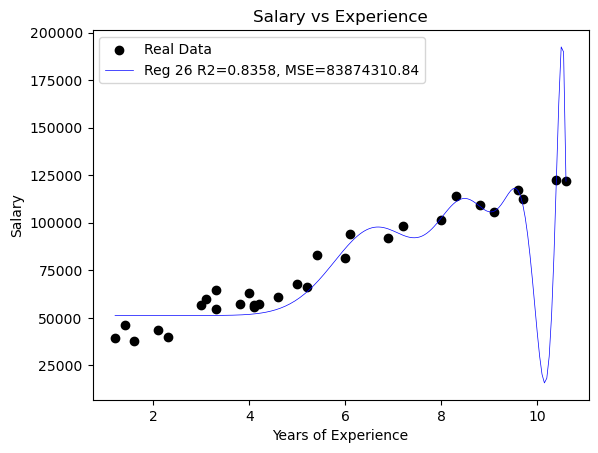

In [31]:
for i in df_poly['Degree'].unique():
    sub = df_poly[df_poly['Degree'] == i]
    plt.scatter(df['YearsExperience'], df['Salary'], color='black', label='Real Data')
    plt.plot(sub['YearsExperience'], sub['Salary'], color='blue', linewidth=0.5, label='Reg {} R2={}, MSE={}'.format(max(sub['Degree']), round(max(sub['R2']), 4), round(max(sub['MSE']), 2)))
    plt.title('Salary vs Experience')
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.legend()
    plt.show()